# THINGS TO IMPORT:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


## Step 1: Load and Preprocess Data


Close column dtype before conversion: object
Close column dtype after conversion: float64
Minimum Close price: 20.64745712280273
Maximum Close price: 196.6697540283203
Mean Close price: 81.49223891535863


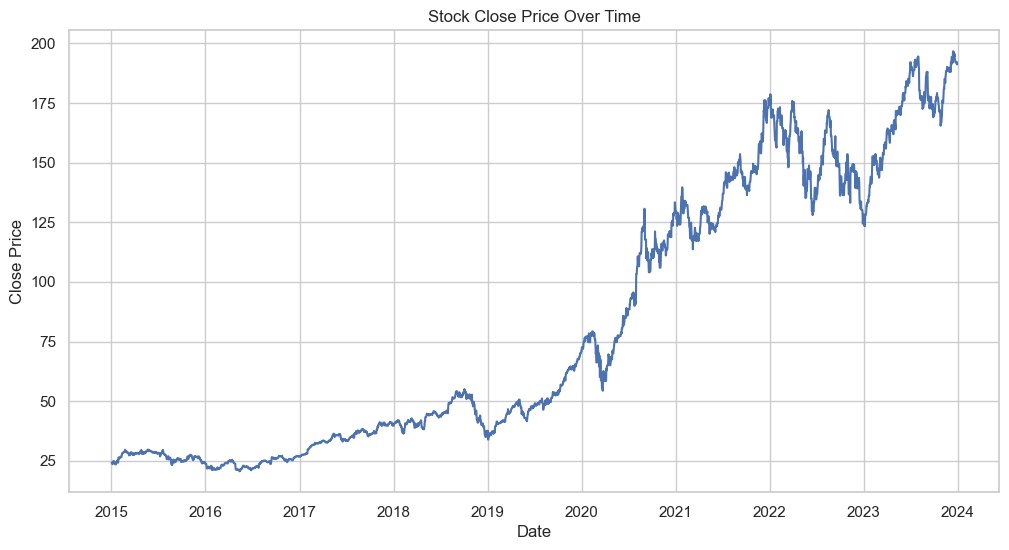

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock dataset
data = pd.read_csv('../data/raw/AAPL_stock.csv', parse_dates=['Date'], index_col='Date')

# Check the data type of 'Close' column
print("Close column dtype before conversion:", data['Close'].dtype)

# Convert 'Close' to numeric if needed, coercing errors to NaN
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Drop rows with NaN in 'Close' (invalid or missing data)
data = data.dropna(subset=['Close'])

print("Close column dtype after conversion:", data['Close'].dtype)

# Ensure daily frequency and fill missing values
data = data.asfreq('D')
data = data.ffill()

print("Minimum Close price:", data['Close'].min())
print("Maximum Close price:", data['Close'].max())
print("Mean Close price:", data['Close'].mean())

# Plot closing prices
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


## Step 2: Train-Test Split


In [3]:
# Split dataset into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


## Step 3: Fit SARIMA Model


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Ensure 'Close' column is numeric
train = data[:'2022'].copy()  # <–– THIS avoids the warning
train['Close'] = pd.to_numeric(train['Close'], errors='coerce')
train = train.dropna(subset=['Close'])

# Define the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)


## Step 4: Forecast and Evaluate with RMSE


In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Forecast future values first
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE using np.sqrt
rmse = np.sqrt(mean_squared_error(test['Close'], forecast))
print(f"SARIMA RMSE: {rmse:.4f}")


SARIMA RMSE: 30.2075


## Step 5: Plot Forecast vs Actual


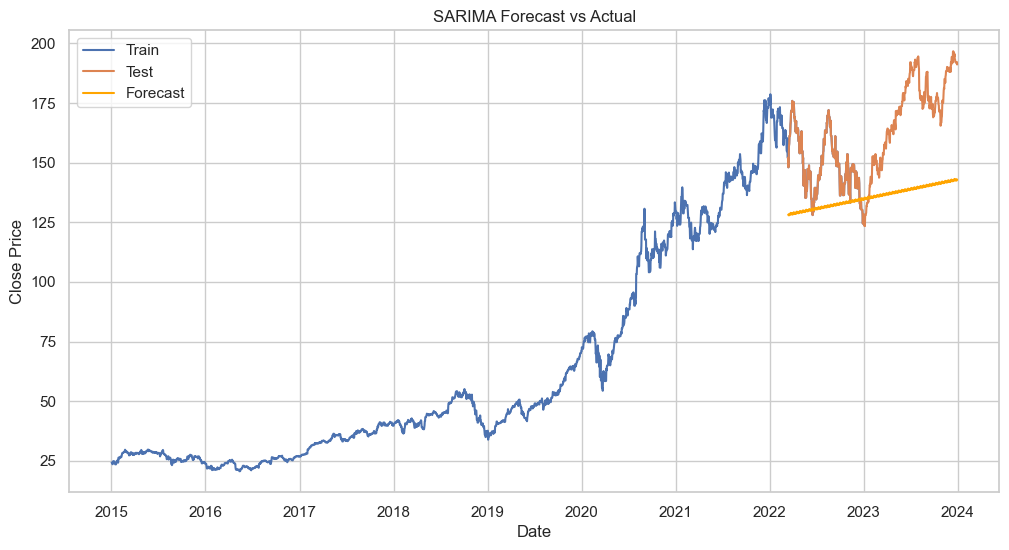

In [6]:
# Plot the actual and forecast values
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error

# use forecast directly
predicted_prices = forecast
actual_prices = test['Close']

# Align both
predicted_prices, actual_prices = predicted_prices.align(actual_prices, join='inner')

# Save predictions
os.makedirs("../data/predictions", exist_ok=True)
np.save("../data/predictions/sarima_pred.npy", predicted_prices)
np.save("../data/predictions/sarima_actual.npy", actual_prices)

# RMSE
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
print("SARIMA RMSE (actual):", rmse)
print(forecast.head())
print(forecast.dtype)



SARIMA RMSE (actual): 41.55567902004547
2023-01-01    128.156191
2023-01-02    128.120324
2023-01-03    128.031817
2023-01-04    127.873160
2023-01-05    128.432348
Freq: D, Name: predicted_mean, dtype: float64
float64


 ## 📌 SARIMA Model Summary

- **Model Used**: SARIMAX (Seasonal ARIMA)
- **Order**: (1, 1, 1)
- **Seasonal Order**: (1, 1, 1, 12)
- **Data Used**: Closing prices from Apple (AAPL), cleaned and resampled to daily frequency.
- **Forecast Period**: 30 days into the future.
- **SARIMA RMSE (actual)**: ~41.55 **&**  **SARIMA RMSE (forecasted)**: ~30.20

- **Interpretation**: SARIMA captured both trend and seasonality, but underperformed compared to ARIMA and LSTM.


